In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, psi = sympy.symbols("t r theta phi psi")

In [3]:
dt, dr, dtheta, dphi, dpsi = sympy.symbols(r"dt dr d\theta d\phi d\psi")

In [4]:
a, b, m, q, g = sympy.symbols("a b m q g")

In [5]:
rplus = sympy.symbols("r_+")

In [6]:
delta_r, delta_theta, rho_squared, xi_a, xi_b, f = sympy.symbols("Delta_r Delta_theta rho^2 Xi_a Xi_b f")

In [7]:
nu, omega = sympy.symbols("nu omega")

### Metric

In [8]:
metric = -delta_theta * ((1 + g ** 2 * r ** 2) * rho_squared * dt + 2 * q * nu) * dt / (xi_a * xi_b * rho_squared)
metric += 2 * q * nu * omega / rho_squared
metric += f * ((delta_theta * dt) / (xi_a * xi_b) - omega) ** 2 / rho_squared ** 2
metric += rho_squared * dr ** 2 / delta_r
metric += rho_squared * dtheta ** 2 / delta_theta
metric += (r ** 2 + a ** 2) * sympy.sin(theta) ** 2 * dphi ** 2 / xi_a
metric += (r ** 2 + b ** 2) * sympy.cos(theta) ** 2 * dpsi ** 2 / xi_b

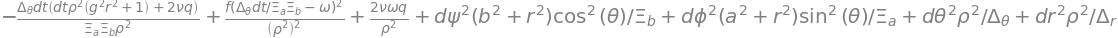

In [9]:
metric

In [10]:
nu_val = b * sympy.sin(theta) ** 2 * dphi + a * sympy.cos(theta) ** 2 * dpsi
nu_val

In [11]:
omega_val = a * sympy.sin(theta) ** 2 * dphi / xi_a + b * sympy.cos(theta) ** 2 * dpsi / xi_b
omega_val

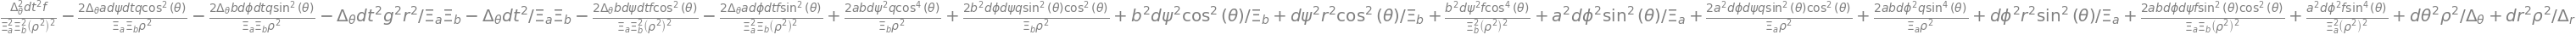

In [12]:
metric = metric.subs({nu: nu_val, omega: omega_val}).expand()
metric

In [13]:
metric_list_matrix = [[0 for i in range(5)] for i in range(5)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2)
metric_list_matrix[0][1] = metric.coeff(dt * dr)
metric_list_matrix[0][2] = metric.coeff(dt * dtheta)
metric_list_matrix[0][3] = metric.coeff(dt * dphi)
metric_list_matrix[0][4] = metric.coeff(dt * dpsi)

# dr
metric_list_matrix[1][0] = metric.coeff(dr * dt)
metric_list_matrix[1][1] = metric.coeff(dr ** 2)
metric_list_matrix[1][2] = metric.coeff(dr * dtheta)
metric_list_matrix[1][3] = metric.coeff(dr * dphi)
metric_list_matrix[1][4] = metric.coeff(dr * dpsi)

# dtheta
metric_list_matrix[2][0] = metric.coeff(dtheta * dt)
metric_list_matrix[2][1] = metric.coeff(dtheta * dr)
metric_list_matrix[2][2] = metric.coeff(dtheta ** 2)
metric_list_matrix[2][3] = metric.coeff(dtheta * dphi)
metric_list_matrix[2][4] = metric.coeff(dtheta * dpsi)

# dphi
metric_list_matrix[3][0] = metric.coeff(dphi * dt)
metric_list_matrix[3][1] = metric.coeff(dphi * dr)
metric_list_matrix[3][2] = metric.coeff(dphi * dtheta)
metric_list_matrix[3][3] = metric.coeff(dphi ** 2)
metric_list_matrix[3][4] = metric.coeff(dphi * dpsi)

# dpsi
metric_list_matrix[4][0] = metric.coeff(dpsi * dt)
metric_list_matrix[4][1] = metric.coeff(dpsi * dr)
metric_list_matrix[4][2] = metric.coeff(dpsi * dtheta)
metric_list_matrix[4][3] = metric.coeff(dpsi * dphi)
metric_list_matrix[4][4] = metric.coeff(dpsi ** 2)

In [14]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡           2               2  2                                              
⎢     Δₜₕₑₜₐ ⋅f     Δₜₕₑₜₐ⋅g ⋅r    Δₜₕₑₜₐ                                   2⋅
⎢    ──────────── - ──────────── - ──────       0     0                   - ──
⎢      2    2   2      Ξₐ⋅Ξ_b      Ξₐ⋅Ξ_b                                     
⎢    Ξₐ ⋅Ξ_b ⋅ρ²                                                              
⎢                                                                             
⎢                                               ρ²                            
⎢                      0                        ──    0                       
⎢                                               Δᵣ                            
⎢                                                                             
⎢                                                     ρ²                      
⎢                      0                        0   ──────                    
⎢                                                   

In [15]:
g_mat.simplify()
g_mat

⎡       ⎛                    2 ⎛ 2  2    ⎞⎞                                   
⎢Δₜₕₑₜₐ⋅⎝Δₜₕₑₜₐ⋅f - Ξₐ⋅Ξ_b⋅ρ² ⋅⎝g ⋅r  + 1⎠⎠                             2⋅Δₜₕₑ
⎢──────────────────────────────────────────  0     0                    ──────
⎢                 2    2   2                                                  
⎢               Ξₐ ⋅Ξ_b ⋅ρ²                                                   
⎢                                                                             
⎢                                            ρ²                               
⎢                    0                       ──    0                          
⎢                                            Δᵣ                               
⎢                                                                             
⎢                                                  ρ²                         
⎢                    0                       0   ──────                       
⎢                                                Δₜₕ

Introduce other functions of q.

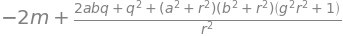

In [16]:
delta_r_val = ((r ** 2 + a ** 2) * (r ** 2 + b ** 2) * (1 + g ** 2 * r ** 2) + q ** 2 + 2 * a * b * q) / r ** 2 - 2 * m
delta_r_val

In [17]:
f_val = 2 * m * rho_squared - q ** 2 + 2 * a * b * q * g ** 2 * rho_squared
f_val

In [18]:
g_mat_2 = g_mat.subs({delta_r: delta_r_val, f: f_val})
g_mat_2

⎡       ⎛       ⎛       2                  2⎞            2 ⎛ 2  2    ⎞⎞       
⎢Δₜₕₑₜₐ⋅⎝Δₜₕₑₜₐ⋅⎝2⋅a⋅b⋅g ⋅q⋅ρ² + 2⋅m⋅ρ² - q ⎠ - Ξₐ⋅Ξ_b⋅ρ² ⋅⎝g ⋅r  + 1⎠⎠       
⎢──────────────────────────────────────────────────────────────────────       
⎢                               2    2   2                                    
⎢                             Ξₐ ⋅Ξ_b ⋅ρ²                                     
⎢                                                                             
⎢                                                                             
⎢                                  0                                     ─────
⎢                                                                             
⎢                                                                             
⎢                                                                        -2⋅m 
⎢                                                                             
⎢                                                   

There are 8 unique matrix elements. In seven of them, there are O(q^2) terms, so there are 3 unique terms each. The eighth is O(1), so there are a total of 22 terms.

In [19]:
A_1, A_2, A_3 = sympy.symbols("A_1 A_2 A_3")
A_4, A_5, A_6 = sympy.symbols("A_4 A_5 A_6")
A_7, A_8, A_9 = sympy.symbols("A_7 A_8 A_9")
A_10, A_11, A_12 = sympy.symbols("A_10 A_11 A_12")
A_13, A_14, A_15 = sympy.symbols("A_13 A_14 A_15")
A_16, A_17, A_18 = sympy.symbols("A_16 A_17 A_18")
A_19, A_20, A_21 = sympy.symbols("A_19 A_20 A_21")
A_22 = sympy.symbols("A_22")

In [20]:
metric_list_matrix_2 = [[0 for i in range(5)] for i in range(5)]

In [21]:
# 00 entry
g00 = g_mat_2[0, 0].expand()
A_1_val = g00.coeff(q ** 2)
A_2_val = g00.coeff(q)
A_3_val = g00 - A_1_val * q ** 2 - A_2_val * q
metric_list_matrix_2[0][0] = A_1 * q ** 2 + A_2 * q + A_3

In [22]:
# 03 entry
g03 = g_mat_2[0, 3].expand()
A_4_val = g03.coeff(q ** 2)
A_5_val = g03.coeff(q)
A_6_val = g03 - A_4_val * q ** 2 - A_5_val * q
metric_list_matrix_2[0][3] = A_4 * q ** 2 + A_5 * q + A_6
metric_list_matrix_2[3][0] = metric_list_matrix_2[0][3]

In [23]:
# 04 entry
g04 = g_mat_2[0, 4].expand()
A_7_val = g04.coeff(q ** 2)
A_8_val = g04.coeff(q)
A_9_val = g04 - A_7_val * q ** 2 - A_8_val * q
metric_list_matrix_2[0][4] = A_7 * q ** 2 + A_8 * q + A_9
metric_list_matrix_2[4][0] = metric_list_matrix_2[0][4]

In [24]:
# 11 entry
denom = sympy.fraction(g_mat_2[1, 1])[1].expand()
A_10_val = denom.coeff(q ** 2)
A_11_val = denom.coeff(q)
A_12_val = denom - A_10_val * q ** 2 - A_11_val * q
metric_list_matrix_2[1][1] = rho_squared / (A_10 * q ** 2 + A_11 * q + A_12)

In [25]:
# 22 entry
A_13_val = g_mat_2[2, 2]
metric_list_matrix_2[2][2] = A_13

In [26]:
# 33 entry
g33 = g_mat_2[3, 3].expand()
A_14_val = g33.coeff(q ** 2)
A_15_val = g33.coeff(q)
A_16_val = g33 - A_14_val * q ** 2 - A_15_val * q
metric_list_matrix_2[3][3] = A_14 * q ** 2 + A_15 * q + A_16

In [27]:
# 34 entry
g34 = g_mat_2[3, 4].expand()
A_17_val = g34.coeff(q ** 2)
A_18_val = g34.coeff(q)
A_19_val = g34 - A_17_val * q ** 2 - A_18_val * q
metric_list_matrix_2[3][4] = A_17 * q ** 2 + A_18 * q + A_19
metric_list_matrix_2[4][3] = metric_list_matrix_2[3][4]

In [28]:
# 44 entry
g44 = g_mat_2[4, 4].expand()
A_20_val = g44.coeff(q ** 2)
A_21_val = g44.coeff(q)
A_22_val = g44 - A_20_val * q ** 2 - A_21_val * q
metric_list_matrix_2[4][4] = A_20 * q ** 2 + A_21 * q + A_22

In [29]:
g_mat_simp = sympy.Matrix(metric_list_matrix_2)
g_mat_simp

⎡    2                                              2                     2   
⎢A₁⋅q  + A₂⋅q + A₃           0             0    A₄⋅q  + A₅⋅q + A₆     A₇⋅q  + 
⎢                                                                             
⎢                            ρ²                                               
⎢        0          ────────────────────   0            0                     
⎢                        2                                                    
⎢                   A₁₀⋅q  + A₁₁⋅q + A₁₂                                      
⎢                                                                             
⎢        0                   0            A₁₃           0                     
⎢                                                                             
⎢    2                                              2                     2   
⎢A₄⋅q  + A₅⋅q + A₆           0             0   A₁₄⋅q  + A₁₅⋅q + A₁₆  A₁₇⋅q  + 
⎢                                                   

### Metric Determinant

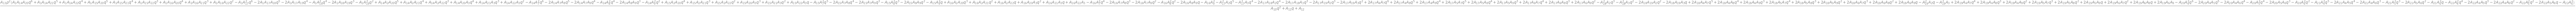

In [30]:
det_g = g_mat_simp.det()
det_g

In [31]:
numerator, denominator = sympy.fraction(det_g)

In [32]:
numerator = numerator.expand().collect(q)

In [33]:
B_0, B_1, B_2, B_3, B_4, B_5, B_6 = sympy.symbols("B_0 B_1 B_2 B_3 B_4 B_5 B_6")

In [34]:
B_1_val = numerator.coeff(q)
B_2_val = numerator.coeff(q ** 2)
B_3_val = numerator.coeff(q ** 3)
B_4_val = numerator.coeff(q ** 4)
B_5_val = numerator.coeff(q ** 5)
B_6_val = numerator.coeff(q ** 6)
B_0_val = numerator - B_1_val * q - B_2_val * q ** 2 - B_3_val * q ** 3 - B_4_val * q ** 4 - B_5_val * q ** 5 - B_6_val * q ** 6

The simplified determinant in terms of powers of q is the following.

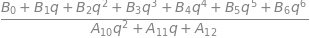

In [35]:
numerator = (B_0 + B_1 * q + B_2 * q ** 2 + B_3 * q ** 3 + B_4 * q ** 4 + B_5 * q ** 5 + B_6 * q ** 6)
det_g_simp = numerator / denominator
det_g_simp

Introduce q.

In [36]:
q_val = -(a - sympy.I * rplus) * (b - sympy.I * rplus) * (1 - sympy.I * rplus)
q_val

In [37]:
q_val = q_val.expand().collect(sympy.I)
q_val

In [38]:
q_i, q_r = sympy.symbols("q_i q_r")
q_i_val = q_val.coeff(sympy.I)
q_r_val = q_val - q_i_val * sympy.I
q_val = q_r + sympy.I * q_i

In [39]:
denominator_with_q = denominator.subs({q: q_val}).expand().collect(sympy.I)
denominator_with_q

In [40]:
numerator_with_q = numerator.subs({q: q_val}).expand().collect(sympy.I)
numerator_with_q

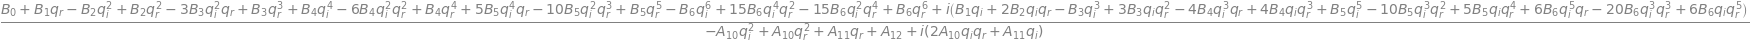

In [41]:
det_g_simp_with_q = numerator_with_q / denominator_with_q
det_g_simp_with_q

In [42]:
alpha, beta, gamma, delta = sympy.symbols("alpha beta gamma delta")
beta_val = numerator_with_q.coeff(sympy.I)
alpha_val = numerator_with_q - beta_val * sympy.I
delta_val = denominator_with_q.coeff(sympy.I)
gamma_val = denominator_with_q - delta_val * sympy.I

In [43]:
norm = gamma ** 2 + delta ** 2

In [57]:
det_g_final = ((alpha + sympy.I * beta) * (gamma - sympy.I * delta)).expand().collect(sympy.I)
det_g_i = det_g_final.coeff(sympy.I)
det_g_r = det_g_final - sympy.I * det_g_i

In [58]:
det_g_r /= norm
det_g_i /= norm

The final determinant is given by the following.

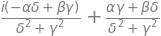

In [59]:
det_g_final = det_g_r + det_g_i * sympy.I
det_g_final

The real and imaginary parts are:

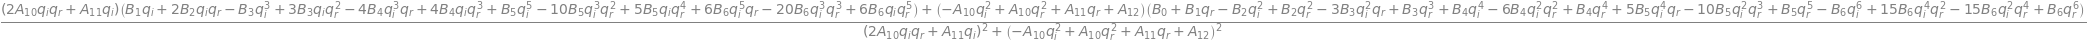

In [60]:
det_g_r.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})

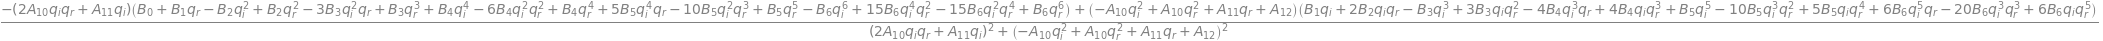

In [61]:
det_g_i.subs({alpha: alpha_val, beta: beta_val, gamma: gamma_val, delta: delta_val})

### Metric Eigenvalues

In [154]:
eigenvalues = g_mat_simp.eigenvals()

In [156]:
eigv = list(eigenvalues.keys())

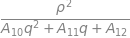

In [162]:
eigv[3]

### Other Functions

In [80]:
delta_theta = 1 - a ** 2 * g ** 2 * sympy.cos(theta) ** 2 - b ** 2 * g ** 2 * sympy.sin(theta) ** 2
delta_theta

In [81]:
xi_a = 1 - a ** 2 * g ** 2
xi_a

In [82]:
xi_b = 1 - b ** 2 * g ** 2
xi_b

In [52]:
rho_squared = r ** 2 + a ** 2 * sympy.cos(theta) ** 2 + b ** 2 * sympy.sin(theta) ** 2
rho_squared